# Importing libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [5]:
data = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\Loan_data.csv", index_col = 0)

# Preview

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [13]:
rows, columns = data.shape
print(f'no of rows : {rows}\n no of columns :{columns}')

no of rows : 614
 no of columns :12


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


# Descriptive stats

In [18]:
describe = data.describe(include = 'all').fillna('_')
describe.to_csv('descriptive_stats.csv')
describe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.0,614.0,592.0,600.0,564.0,614,614
unique,2,2,4,2,2,_,_,_,_,_,3,2
top,Male,Yes,0,Graduate,No,_,_,_,_,_,Semiurban,Y
freq,489,398,345,480,500,_,_,_,_,_,233,422
mean,_,_,_,_,_,5403.459283,1621.245798,146.412162,342.0,0.842199,_,_
std,_,_,_,_,_,6109.041673,2926.248369,85.587325,65.12041,0.364878,_,_
min,_,_,_,_,_,150.0,0.0,9.0,12.0,0.0,_,_
25%,_,_,_,_,_,2877.5,0.0,100.0,360.0,1.0,_,_
50%,_,_,_,_,_,3812.5,1188.5,128.0,360.0,1.0,_,_
75%,_,_,_,_,_,5795.0,2297.25,168.0,360.0,1.0,_,_


# EDA

In [21]:
data.Credit_History = data.Credit_History.astype(object)
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
num_df = data.select_dtypes('number')
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001002,5849,0.0,NaN,360.0
LP001003,4583,1508.0,128.0,360.0
LP001005,3000,0.0,66.0,360.0
LP001006,2583,2358.0,120.0,360.0
LP001008,6000,0.0,141.0,360.0


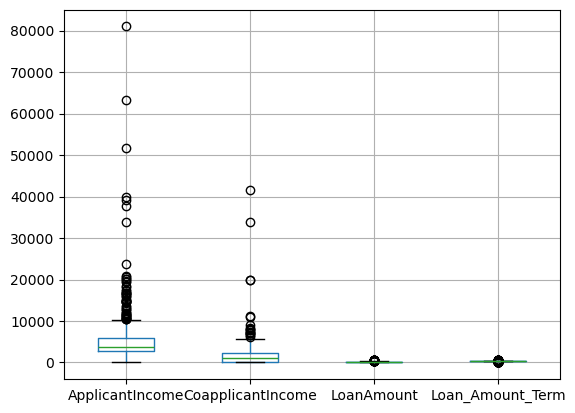

In [25]:
num_df.boxplot()
plt.show()

In [27]:
bins = list(num_df.ApplicantIncome.quantile([0,.25,.5]).values)
bins.append(num_df.ApplicantIncome.max())


labels = ['low','high','Extreme']
pd.cut(num_df.ApplicantIncome,labels=labels,bins=bins)

Loan_ID
LP001002    Extreme
LP001003    Extreme
LP001005       high
LP001006        low
LP001008    Extreme
             ...   
LP002978       high
LP002979    Extreme
LP002983    Extreme
LP002984    Extreme
LP002990    Extreme
Name: ApplicantIncome, Length: 614, dtype: category
Categories (3, object): ['low' < 'high' < 'Extreme']

In [29]:
describe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.0,614.0,592.0,600.0,564.0,614,614
unique,2,2,4,2,2,_,_,_,_,_,3,2
top,Male,Yes,0,Graduate,No,_,_,_,_,_,Semiurban,Y
freq,489,398,345,480,500,_,_,_,_,_,233,422
mean,_,_,_,_,_,5403.459283,1621.245798,146.412162,342.0,0.842199,_,_
std,_,_,_,_,_,6109.041673,2926.248369,85.587325,65.12041,0.364878,_,_
min,_,_,_,_,_,150.0,0.0,9.0,12.0,0.0,_,_
25%,_,_,_,_,_,2877.5,0.0,100.0,360.0,1.0,_,_
50%,_,_,_,_,_,3812.5,1188.5,128.0,360.0,1.0,_,_
75%,_,_,_,_,_,5795.0,2297.25,168.0,360.0,1.0,_,_


In [31]:
data_cleaned1 = data.copy()



for columns in num_df.columns:
    print(columns)
    try: 
        bins = list(num_df[columns].quantile([.25,.5]).values)
        bins.append(num_df[columns].max())
        bins.insert(0,(num_df[columns].min()-1))
        labels = ['low','high','Extreme']
        data_cleaned1[columns] = pd.cut(num_df[columns],labels=labels,bins=bins)
    except:
        print(f'I did not process: {columns}')

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
I did not process: Loan_Amount_Term


In [33]:
data_cleaned1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,Extreme,low,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Extreme,Extreme,high,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,high,low,low,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,low,Extreme,high,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,Extreme,low,Extreme,360.0,1.0,Urban,Y


In [35]:
data_cleaned1.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,high,low,low,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,Extreme,low,low,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,Extreme,high,Extreme,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,Extreme,low,Extreme,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,Extreme,low,Extreme,360.0,0.0,Semiurban,N


In [37]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    object  
 1   Married            611 non-null    object  
 2   Dependents         599 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      582 non-null    object  
 5   ApplicantIncome    614 non-null    category
 6   CoapplicantIncome  614 non-null    category
 7   LoanAmount         592 non-null    category
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     564 non-null    object  
 10  Property_Area      614 non-null    object  
 11  Loan_Status        614 non-null    object  
dtypes: category(3), float64(1), object(8)
memory usage: 66.3+ KB


# MV

In [40]:
data_cleaned1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
data_cleaned1[data_cleaned1.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP002979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP002983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


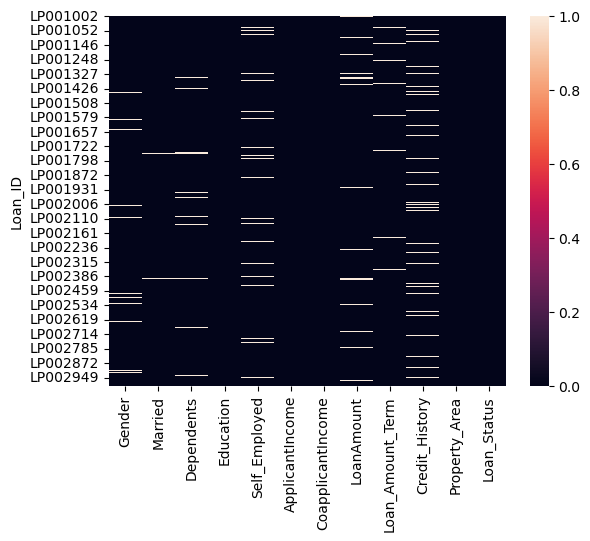

In [44]:
sns.heatmap(data_cleaned1.isnull())
plt.show()

# Missing Values

In [47]:
data_cleaned1.dtypes#.isnull().sum()

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome      category
CoapplicantIncome    category
LoanAmount           category
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
dtype: object

In [49]:
data_cleaned2 = data_cleaned1.astype(object)
data_cleaned2.fillna(data_cleaned2.mode().loc[0],inplace=True)
data_cleaned2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,Extreme,low,Extreme,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Extreme,Extreme,high,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,high,low,low,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,low,Extreme,high,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,Extreme,low,Extreme,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,high,low,low,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,Extreme,low,low,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,Extreme,high,Extreme,360.0,1.0,Urban,Y


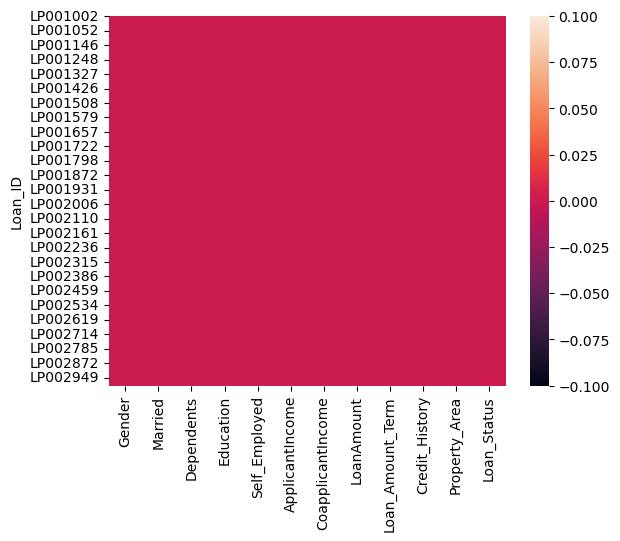

In [51]:
sns.heatmap(data_cleaned2.isnull())
plt.show()

In [53]:
data_cleaned2.to_csv('Analysis_data.csv')

In [55]:
try:
    x = int(input('Enter a number'))
except: 
    print('You did not enter the number')

Enter a number 99


In [57]:
columns

'Loan_Amount_Term'

In [59]:
bins = list(num_df['Loan_Amount_Term'].quantile([.25,.5]).values)
bins.append(num_df['Loan_Amount_Term'].max())
bins.insert(0,(num_df['Loan_Amount_Term'].min()-1))
bins[1] =  bins[1] - 1

labels = ['low','high','Extreme']
data_cleaned1[columns] = pd.cut(num_df['Loan_Amount_Term'],labels=labels,bins=bins)


In [61]:
data_cleaned1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,Extreme,low,NaN,high,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Extreme,Extreme,high,high,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,high,low,low,high,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,low,Extreme,high,high,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,Extreme,low,Extreme,high,1.0,Urban,Y


In [63]:
data_cleaned2['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [65]:
n = len(data_cleaned2)
p_0 = 360/n
print('p(0):', p_0)

p_1 = 102/n
print('p(1):', p_1)

p_2 = 101/n
print('p(2):', p_1)

p_3 = 1 - ( p_0 + p_1 + p_2 )
print('p(3):', p_3)

p(0): 0.5863192182410424
p(1): 0.16612377850162866
p(2): 0.16612377850162866
p(3): 0.08306188925081437


In [67]:
cont = pd.crosstab(data_cleaned2.Loan_Status, data_cleaned2.Dependents, margins = True, margins_name = 'Total')
cont/614

Dependents,0,1,2,3+,Total
Loan_Status,,,,,
N,0.184039,0.058632,0.040717,0.029316,0.312704
Y,0.402280,0.107492,0.123779,0.053746,0.687296
Total,0.586319,0.166124,0.164495,0.083062,1.000000


In [90]:
(0.184 + 0.690) - 0.104

0.7699999999999999

In [92]:
0.56/0.81

0.6913580246913581

In [69]:
conts_table = []

for i in data_cleaned2.columns[:-1]:
    cont = pd.crosstab(data_cleaned2.Loan_Status,data_cleaned2[i])
    conts_table.append(cont)

In [71]:
contingency_table = pd.concat(conts_table,axis=1)/n
contingency_table['Total_'] = contingency_table.sum(axis=1)
c = contingency_table.T
c['Total_1'] = c.sum(axis=1)

c.T

,Female,Male,No,Yes,0,1,2,3+,Graduate,Not Graduate,...,240.0,300.0,360.0,480.0,0.0,1.0,Rural,Semiurban,Urban,Total_
Loan_Status,,,,,,,,,,,,,,,,,,,,,
N,0.060261,0.252443,0.128664,0.184039,0.184039,0.058632,0.040717,0.029316,0.228013,0.084691,...,0.001629,0.008143,0.258958,0.014658,0.133550,0.179153,0.112378,0.087948,0.112378,3.439739
Y,0.122150,0.565147,0.218241,0.469055,0.402280,0.107492,0.123779,0.053746,0.553746,0.133550,...,0.004886,0.013029,0.597720,0.009772,0.011401,0.675896,0.179153,0.291531,0.216612,7.560261
Total_1,0.182410,0.817590,0.346906,0.653094,0.586319,0.166124,0.164495,0.083062,0.781759,0.218241,...,0.006515,0.021173,0.856678,0.024430,0.144951,0.855049,0.291531,0.379479,0.328990,11.000000
